Gráfico QuickSort vs Random QuickSort
===

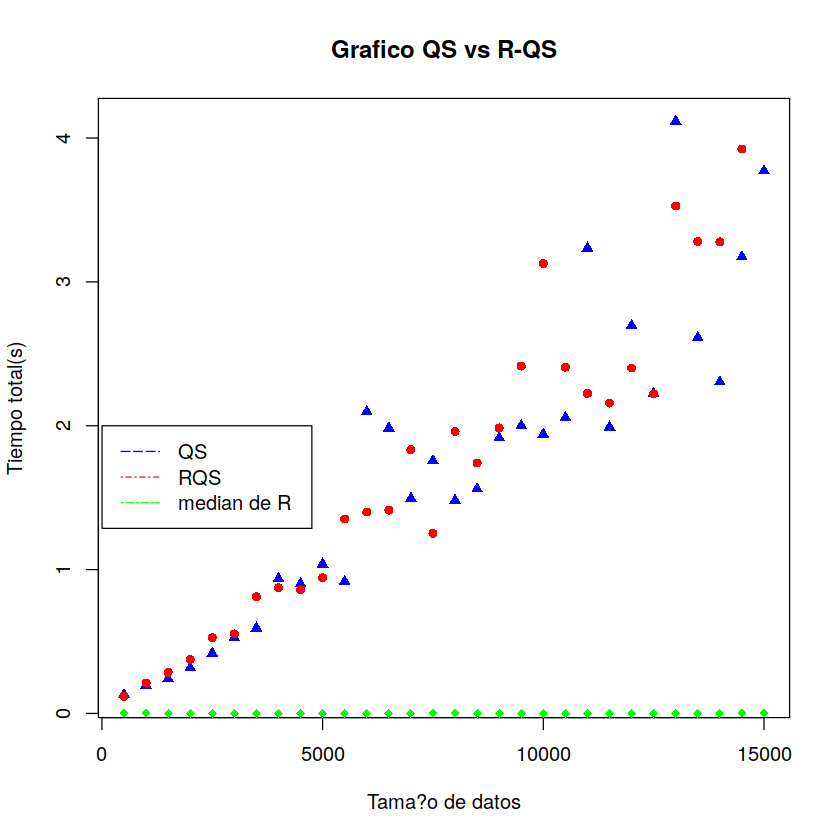

In [2]:
#################################################

ref <- function(..., envir=parent.frame(), inherits=TRUE){
  
  #En esta funcion utiliza la data situada en el Global Environment
  #para una simulacion de los punteros de C. Es necesario, ya que
  #evita la manipulacion de muchos datos retornados (como soluci?n 
  #alterna se usa listas), y hace que el c?digo sea m?s limpio y claro.
  
  cl <- match.call(expand.dots = TRUE)
  cl[c(1, match(c("envir", "inherits"), names(cl), 0L))] <- NULL
  
  for (x in as.list(cl)) {
    
    s <- substitute(x)
    sx <- do.call(substitute, list(s), envir=envir)
    dx <- deparse(sx)
    expr <- substitute(assign(dx, s, envir=parent.frame(), inherits=inherits))
    do.call(on.exit, list(expr, add=TRUE), envir=envir)
    
  }

  #Extraido de:
  #https://stackoverflow.com/questions/2603184/can-you-pass-by-reference-in-r

}

#################################################

CAMBIO <- function(A,i,j){
  
  #Esta funci?n intercambia los valores de las posiciones i y j
  #de un vector de datos A. No es necesario indicar una actualizacion
  #o asignacion del vector A, ya que utiliza la funcion ref.
  
  ref(A)      #El valor mostrado esta referenciado, es decir que
              #si se modifica en la funcion se modifica el original
  
  a1 <- A[i]  #Se agrega el dato en una variable temporal
  a2 <- A[j]  #para evitar problemas con el compilador
  
  A <- replace(A,c(i,j),c(a2,a1)) #Se cambia con la funcion replace
}

################################################

PARTICION <- function(A,p,r){
  
  #Esta funcion lo que hace es acomodar los valores del vector A de la posicion
  #p hasta la r, utilizando un pivot como mediador, es decir, los valores menores
  #que el pivot iran a la izquierda del pivot, mientras que los mayores a la derecha.
  
  ref(A)          #El valor mostrado esta referenciado
  x <- A[r]       #x es el pivot que es ultimo dato de la porcion seleccionada en A
  i <- p-1        #Es una posici?n anterior al primero, sirve para saber en que
                  #posicion se encuentra el menor mas cercano al pivot
  
  for(j in p:(r-1)){    #Va desde el primero hasta el penultimo
    
    if(A[j] <= x){      #Si es menor al pivot
      i <- i+1          #se aumenta en 1 y
      CAMBIO(A,i,j)     #se hace el cambio entre los valores de las posiciones i y j
    }
                        #No se realiza nada si es mayor
  }
  
  CAMBIO(A,i+1,r)       #Por ultimo se hace un intercambio entre el primer mayor
                        #y el pivot, de esta manera quedaria un vector de la forma:
                        #(menores que el pivot) + pivot + (mayores que el pivot)
  
  return(i+1)           #regresa la posici?n del pivot
  
}

################################################

RANDOM.PARTICION <- function(A,p,r){
  
  #Es la misma funcion que PARTICION, solo que aleatorizamos la posicion del 
  #pivot, es decir, se selecciona cualquiera al azar y se intercambia con el
  #ultimo. Luego se llama a PARTICION.
  
  ref(A)            #El valor mostrado esta referenciado
  
  ##random##*
  
  tem <- sample(p:r,1,replace = F)    #tem es un aleatorio que
  CAMBIO(A,r,tem)                     #se cambia con el ?ltimo elemento del vector A
  
  ##########*
  
  PARTICION(A,p,r)          #se llama a PARTICION
  
}

################################################

QUICKSORT <- function(A,p=1,r=length(A)){       #los valores por defecto para facilitar el arreglo

  #Esta funcion arregla toda la cadena A utilizando la funcion PARTICION en todas 
  #las partes del vector.
  
  if(p < r){      #Si el tama?o del vector es lo suficientemente grande, es decir,
                  #no es vacio, es ejecuta el c?digo, sino no.
    
    q <- PARTICION(A,p,r)       #Se ejecuta PARTICION y se devuelve la posicion del
                                #pivot (los cambios hechos en PARTICION afectaron a A,
                                #por eso no es necesario hacer un retorno).
    
    A <- QUICKSORT(A,p,q-1)     #Se hace una recurrencia, esta vez se analiza la seccion
                                #menores que el pivot.
    A <- QUICKSORT(A,q+1,r)     #Una vez terminado la parte izquierda, se procede a la
                                #derecha, es decir a los mayores.
    
  }
  return(A)             #se coloca return para que se entienda que es lo que retorna
                        
}

################################################

RANDOM.QUICKSORT <- function(A,p=1,r=length(A)){    #los valores por defecto para facilitar el arreglo
  
  #Esta funcion realiza la misma tarea que QUICKSORT solo que utiliza RANDOM.PARTCION
  
  if(p < r){
    
    q <- RANDOM.PARTICION(A,p,r)
    A <- RANDOM.QUICKSORT(A,p,q-1)
    A <- RANDOM.QUICKSORT(A,q+1,r)
    
  }
  return(A)             #se coloca return para que se entienda que es lo que retorna
                        #sin embargo no es necesario ya que 'A' esta por referencia
}

################################################

QUICKSELECT <- function(A,p=1,r=length(A),m=(r+p)/2){
  
  #Esta funcion te devuelve el valor de la posicion m del vector A ordenado
  #desde p hasta r. Se puede decir que encuentra el k-esimo. No ordenado todo,
  #solo lo necesario, ya que si la posici?n requerida es menor a la encontrada
  #entonces se dirije a la izquierda o si es mayor a la derecha, no en ambos lados
  #como el QUICKSORT. Al final, si coincide devuelve el valor.

  if(p == r){       #Si es de tama?o 1,
    return(A[p])    #devuelve ese ?nico valor.
  }
  
  q <- PARTICION(A,p,r)     #Realiza PARTICION y q es pivot.
  
  if(m == q){       #Si q es igual a la posicion requerida m,
    return(A[q])    #devuelve ese valor.
  }
  else{             #De lo contrario
    
    if(m<q){        #Si la posicion requerida m es menor al pivot q,
      QUICKSELECT(A,p,q-1,m)  #se autoejecuta ahora solo para valores menores que
                              #el pivot(izquierda)
    }
    else{                     #Sino
      QUICKSELECT(A,q+1,r,m)  #se autoejecuta ahora solo para valores mayores que
                              #el pivot(derecha)
    }
    
  }
}

################################################

RANDOM.QUICKSELECT <- function(A,p=1,r=length(A),m=(r+p)/2){

  #Es la misma funcion que el QUICKSELECT, solo que utiliza el RANDOM.PARTICION
  #para aleatorizar
  
  if(p == r){
    return(A[p])
  }
  
  q <- RANDOM.PARTICION(A,p,r)
  
  if(m == q){
    return(A[q])
  }
  else{
    
    if(m<q){
      RANDOM.QUICKSELECT(A,p,q-1,m)
    }
    else{
      RANDOM.QUICKSELECT(A,q+1,r,m)
    }
    
  }
  
}

################################################

MEDIANA.QSELECT <- function(A){
  
  #Esta funcion es una forma mas segura de obtener la mediana, ya que funciona
  #para vectores de tama?os impares y pares (especialmente los pares ya que se
  #tiene que hacer un promedio)
  
  if(length(A) %% 2 == 1){    #Si es impar
    med <- QUICKSELECT(A)     #se ejecuta QUICKSELECT
  }
  else{                       #sino
    med <- (QUICKSELECT(A,m=(length(A)/2)) + QUICKSELECT(A,m=(length(A)/2)+1))/2
                              #se hace un promedio de las dos posiciones centrales
  }
  return(med)     #Retorna el valor encontrado
}

################################################

MEDIANA.RANDOM.QSELECT <- function(A){
  
  #Igual que el anterior, solo que utiliza RANDOM.QUICKSELECT
  
  if(length(A) %% 2 == 1){
    med <- RANDOM.QUICKSELECT(A)
  }
  else{
    med <- (RANDOM.QUICKSELECT(A,m=(length(A)/2)) + RANDOM.QUICKSELECT(A,m=(length(A)/2)+1))/2
  }
  return(med)
}

################################################
####aqui comienza la manipulacion de datos######
################################################

  #A continuaci?n vamos a hacer un analisis del comportamiento del algoritmo QUICKSELECT y
  #RANDOM-QUICKSELECT, ya que se quiere demostrar cual es el impacto de la aleatorizaci?n.
  #Seg?n la teor?a, el QUICKSELECT tiene un compartamiento en un caso promedio de O(n), pero
  #para el peor caso seria en O(n^2). Por ello, este comportamiento se arreglar?a 
  #utilizando la aleatorizaci?n creando as? el RANDOM-QUICKSELECT. Se crear? una gr?fica
  #"tama?o de datos vs. tiempo total" en donde se podra observar mediante puntos la 
  #diferencia entre QUICKSELECT y RANDOM-QUICKSELECT.

  #En esta parte se utilizara un array llamado "tam" que indica los tama?os de los vectores
  #a crear, puede ser modificado a voluntad (incluir y excluir datos).

  #tam=c(100,300,500,1000,3000,5000,7000,9000,10000,12000,13000,14000,15500)
  tam=c(500*1:30)     #mucho m?s ordenado y equitativo que el anterior
  
  
  #La "iteraciones" sirven para realizar el mismo proceso la cantidad de veces
  #y asi hacer una comparacion entre los datos
  
  iteraciones=5
  
  
  #Se crean los vectores donde se encontraran los tiempos de ejecuci?n para cada
  #algoritmo. Se usa median() como comparaci?n adicional
  
  vector.qs <- vector()             #tiempos de QUICKSELECT
  vector.random.qs <- vector()      #tiempos de RANDOM-QUICKSELECT
  vector.median <- vector()         #tiempos de median() de R

  for (j in 1:length(tam)){         #recorre desde el 1 hasta la cantidad de datos colocados en "tam"
    
    for (i in 1:iteraciones) {      #ejecuta "iteraciones" de veces
      
      A <- sample(1:50000,tam[j],replace=T)   #Crea un vector aleatorio de 1 a 50000
                                              #con tama?o tam[j] y se puede repetir
      
      B<-A                          #Se copia a B
      C<-A                          #Se copia a C
      
      t <- proc.time()              #Se inicia el tiempo
      med.QS <- MEDIANA.QSELECT(A)  #se ejecuta
      t <- proc.time()-t            #se devuelve el tiempo
      vector.qs <- rbind(vector.qs,t[3])  #Se agrega el valor t[3] en el vector
                                          #t[3] es el tiempo total
      
      t <- proc.time()
      med.RQS <- MEDIANA.RANDOM.QSELECT(B)
      t <- proc.time()-t
      vector.random.qs <- rbind(vector.random.qs,t[3])
    
      t <- proc.time()
      med.m <- median(C)
      t <- proc.time()-t
      vector.median <- rbind(vector.median,t[3])
      
    }

  }
  
  vector.qs <- matrix(vector.qs,nrow=iteraciones,ncol=length(tam)) #devuelve una matrix
  colnames(vector.qs) <- tam              #nombra las columnas
  y1 <- colMeans(vector.qs)       #Se crea el vector que es el promedio de los valores
                                  #de toda la columna
  
  vector.random.qs <- matrix(vector.random.qs,nrow=iteraciones,ncol=length(tam))
  colnames(vector.random.qs) <- tam
  y2 <- colMeans(vector.random.qs)
  
  vector.median <- matrix(vector.median,nrow=iteraciones,ncol=length(tam))
  colnames(vector.median) <- tam
  y3 <- colMeans(vector.median)
  
  #Aqui se crea la grafica con los tres vectores y1,y2,y3(tiempos) y tam(tama?os)
  
  plot(tam,y1,pch=17,col="blue",xlab="Tama?o de datos",ylab="Tiempo total(s)",main="Grafico QS vs R-QS")
  points(tam,y2,pch=16,col="red")
  points(tam,y3,pch=18,col="green")
  
  #Se agrega una leyenda para entender el grafico
  legend(x=3, y=2, legend=c("QS", "RQS","median de R"), lty=c(17,16,18),col=c("blue", "red","green"))
  #lines(c(tam[1],tam[length(tam)]),c(y1[1],y1[length(y1)]),col="blue")
  #lines(c(tam[1],tam[length(tam)]),c(y2[1],y2[length(y2)]),col="red")
  #lines(c(tam[1],tam[length(tam)]),c(y3[1],y3[length(y3)]),col="green")
  
  ################################################
  ################################################
  
  #Como podemos ver los datos de QS tienden a estar m?s dispersos que los de R-QS,
  #hasta se puede ver una tendencia lineal m?s visble que QS. Por lo que se comprueba
  #la duda de la complejidad O(n) del  algoritmo QUICKSELECT para caso promedio,
  #es decir, aleatorizando para evitar el peor caso.
  
  #Se comprueba que la funci?n median() incorporado en R tiende a ser constante ya que
  #no importa si es 500 o 15000 datos, el tiempo es igual, el cual es un dato 
  #interesante, ya que la funcion median() utiliza el algoritmo "RADIX SORT" es con complejidad O(n), por
  #lo tanto deber?a de haber al menos un cambio al modificar n. Este ser? otro tema 
  #para analizar m?s adelante